In [58]:
import matplotlib.pylab as plt
import numpy as np
from matplotlib.colors import LogNorm
%matplotlib inline
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
top_path = "/afs/ihep.ac.cn/users/l/luoxj/DSNB_component_fitting/code_fitting/train_dir/"
# name_model = "3_center"
# name_model = "3_uniform_combine"
# name_model = "3_uniform"
# name_model = "3_uniform_combine_add_vertex"
name_model = "3_uniform_combine_add_vertex_add_energy"
# name_model = "3_center_combine_add_vertex_add_energy"
f = np.load(top_path+f"model_CNN1D_{name_model}/predict.npz", allow_pickle=True)

print(f.files)

dir_evts = f["dir_events"].item()
predict = f["predict"]
truth = f["truth"]
train_loss = f["train_loss"]
test_loss = f["test_loss"]

f.close()

['dir_events', 'predict', 'truth', 'train_loss', 'test_loss']


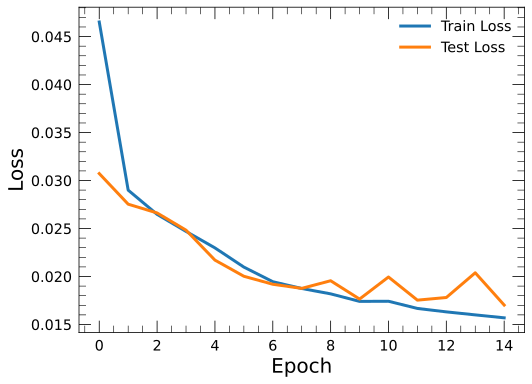

In [59]:
import os,sys
plt.figure()
base_path = "/afs/ihep.ac.cn/users/l/luoxj/gpu_500G/DSNB_component_fitting/"
dir_save_figure = base_path+f"/train_dir/figure/model_{name_model}/"
if not os.path.isdir(dir_save_figure):
    os.makedirs(dir_save_figure)
x_center = range(len(train_loss))
plt.plot(x_center, train_loss, label="Train Loss")
plt.plot(x_center, test_loss, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig(dir_save_figure+"train_loss.png")

[[-12440.1953125    4366.16552734 -11097.65527344]
 [  4566.24072266  12369.15039062   1456.52844238]]


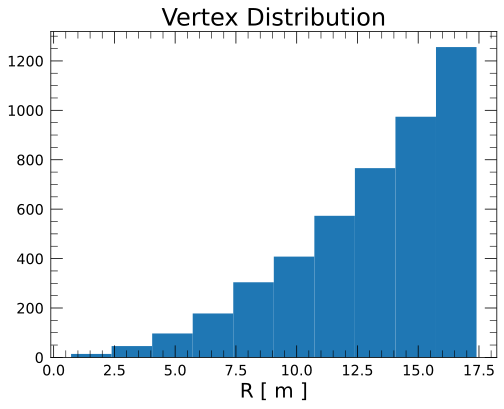

In [60]:
plt.figure()
print(dir_evts["vertex"][:2])
v_R = np.sum(dir_evts["vertex"]**2, axis=1)**0.5/1000
plt.hist(v_R)
plt.xlabel("R [ m ]")
plt.title("Vertex Distribution")
plt.savefig(dir_save_figure+"vertex_distribution.png")

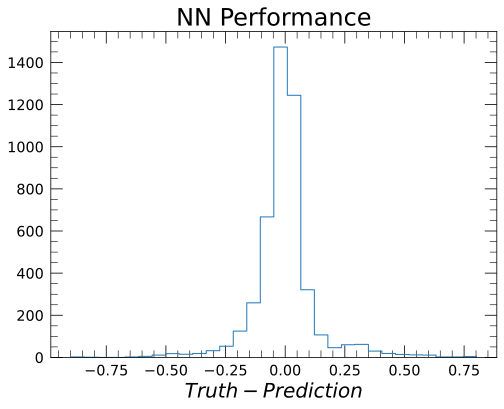

In [61]:
import root_numpy as rn
import ROOT
from array import array
plt.figure()
h = plt.hist(truth-predict, bins=30, histtype="step")
plt.xlabel("$Truth - Prediction$")
plt.title("NN Performance")
plt.savefig(dir_save_figure+"bias.png")

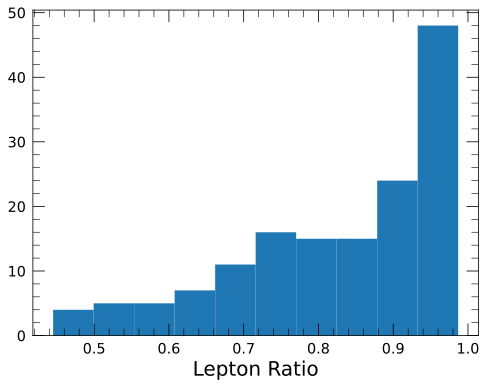

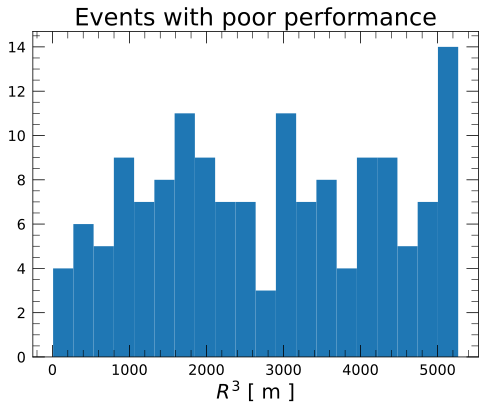

In [62]:
index_poor_predict = (truth-predict)>0.3
plt.figure()
plt.hist(dir_evts["lepton_ratio"][index_poor_predict])
plt.xlabel("Lepton Ratio")

plt.figure()
plt.hist(v_R[index_poor_predict]**3, bins=20)
plt.xlabel("$R^3$ [ m ]")
plt.title("Events with poor performance")
plt.savefig(dir_save_figure+"vertex_distribution_poor_performance.png")

Name: histogram Title: histogram NbinsX: 30
 FCN=571.573 FROM MIGRAD    STATUS=CONVERGED     103 CALLS         104 TOTAL
                     EDM=2.55982e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.36515e+03   3.28652e+01   2.50772e-01  -3.44483e-06
   2  Mean        -8.04892e-03   1.09537e-03   1.23029e-05  -1.53033e-01
   3  Sigma        6.69615e-02   1.22018e-03   3.17400e-05   2.04741e-03


Warning in <TROOT::Append>: Replacing existing TH1: histogram (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /afs/ihep.ac.cn/users/l/luoxj/gpu_500G/DSNB_component_fitting//train_dir/figure/model_3_uniform_combine_add_vertex_add_energy//Fit_Hist_ROOT.png has been created


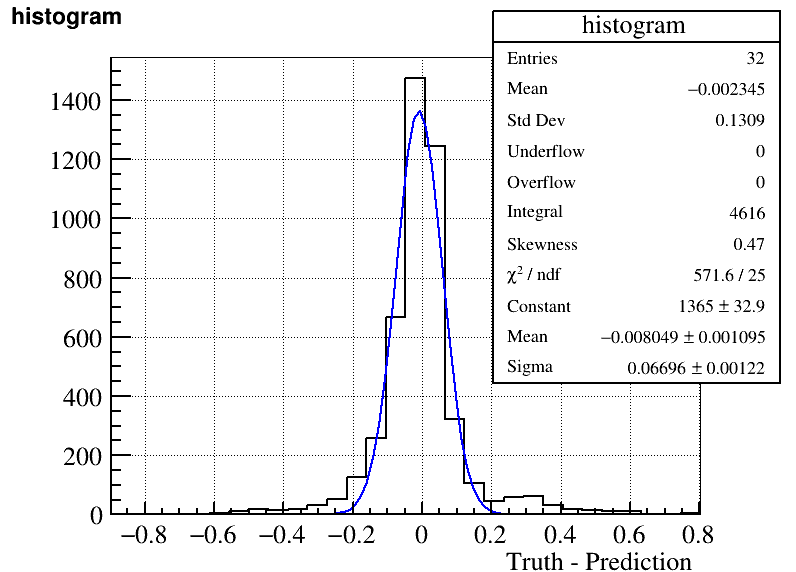

In [63]:
edges = h[1]
h_root = ROOT.TH1D("histogram", "histogram", len(edges)-1,array("d", edges))
rn.array2hist(h[0], h_root)
print(h_root)
c = ROOT.TCanvas("c", "c", 800, 600)
ROOT.gStyle.SetOptFit(1)
h_root.Fit("gaus")
h_root.SetXTitle("Truth - Prediction")
h_root.Draw()
c.Draw()
c.SaveAs(dir_save_figure+"/Fit_Hist_ROOT.png")



Text(0.5, 0, 'Lepton Ratio')

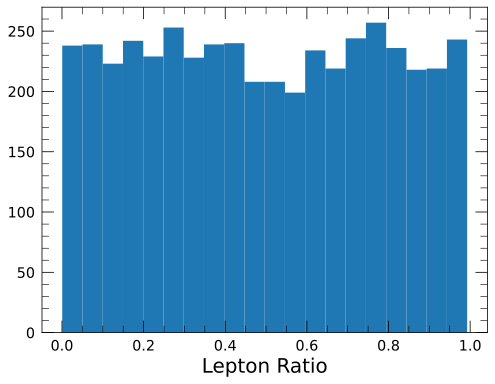

In [64]:
plt.hist(dir_evts["ratio_lepton"], bins=20)
plt.xlabel("Lepton Ratio")

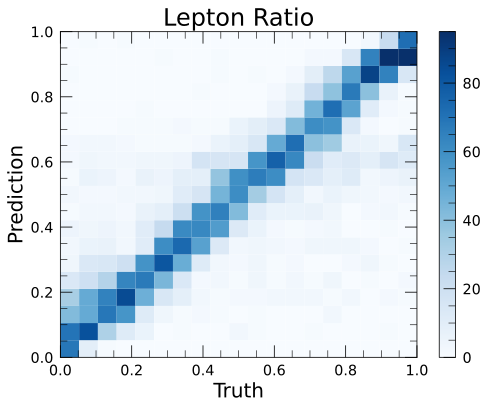

In [65]:
plt.figure()
bins = np.linspace(0, 1, 20)
plt.hist2d(truth, predict, bins=(bins,bins), cmap="Blues")
plt.xlim(0,1)
plt.ylim(0,1)
plt.colorbar()
plt.title("Lepton Ratio")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.savefig(dir_save_figure+"2D_Truth_Prediction.png")


(86,)
(72,)


(-20.0, 150.0)

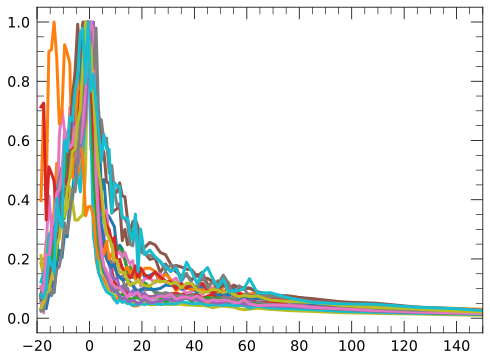

In [66]:
bins_hist = np.array([-19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6,
                      7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46,
                      48, 50, 52, 54, 56, 58, 60, 62, 66, 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366,
                      402, 440, 480, 522, 566, 612, 660, 710, 762, 816])
bin_center = (bins_hist[1:]+bins_hist[:-1])/2
index_low_lepton_ratio = dir_evts["lepton_ratio"]<0.1
print(dir_evts["h_time"][0].shape)
print(dir_evts["h_time_norm"][0].shape)
for i in range(20):
    h_time_divide_width = dir_evts["h_time_with_charge"][index_low_lepton_ratio][i]/np.diff(bins_hist)
    plt.plot(bin_center,h_time_divide_width/np.max(h_time_divide_width))
    # plt.plot(dir_evts["h_time_norm"][index_low_lepton_ratio][i])
plt.xlim(-20, 150)


4616


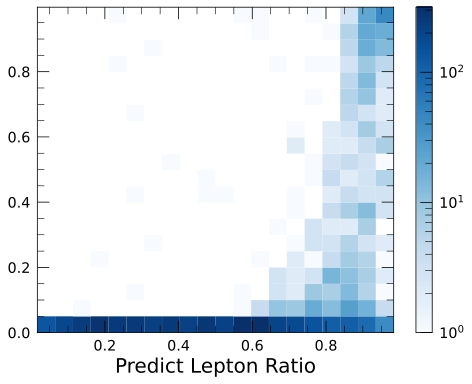

In [67]:
print(len(predict))
plt.hist2d(predict, dir_evts["PSD"], bins=(20,20), cmap="Blues", norm=LogNorm())
plt.xlabel("Predict Lepton Ratio")
plt.colorbar()


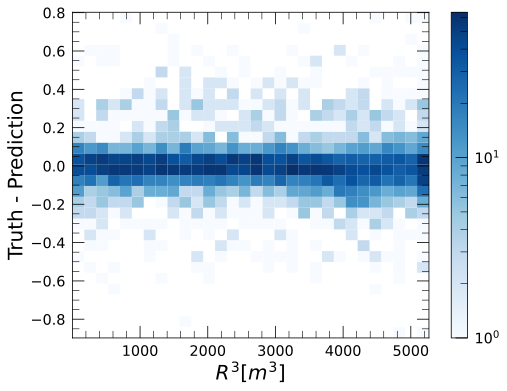

In [68]:
plt.figure()
plt.hist2d(v_R**3, truth-predict, bins=(30,30), cmap="Blues",
           norm=LogNorm())
plt.colorbar()
plt.xlabel("$R^3 [ m^3 ]$")
plt.ylabel("Truth - Prediction")
plt.savefig(dir_save_figure+"vertex_bias.png")

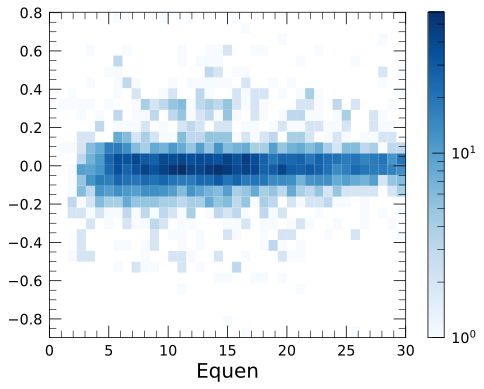

In [69]:
plt.hist2d(dir_evts["equen"], truth-predict, norm=LogNorm(),bins=(np.linspace(0,30, 40),30), cmap="Blues")
plt.xlabel("Equen")
plt.colorbar()

Text(0.5, 0, 'Lepton Ratio')

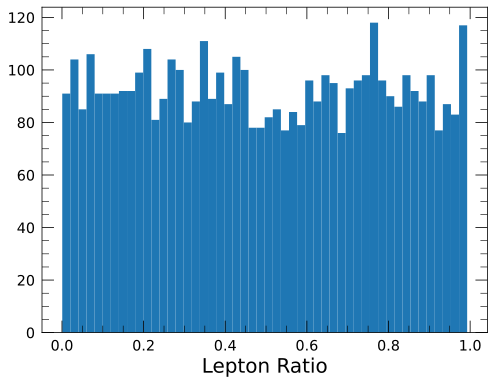

In [70]:
plt.hist(dir_evts["lepton_ratio"], bins=50)
plt.xlabel("Lepton Ratio")